# **1. Perkenalan**
---
### **Final Project: Clusturn - Prediksi Customer Churn**

### **CLUSTERING NOTEBOOK UNTUK CUSTOMER SEGMENTATION**

**Group 2:** 
1. Azhar Muhammad
2. Nathanael August Zefanya
3. Pradita Ajeng Wiguna

Proyek ini bertujuan untuk membangun sistem peringatan dini proaktif menggunakan machine learning untuk mengidentifikasi pelanggan telekomunikasi yang berisiko tinggi untuk churn (berhenti berlangganan).


# **2. Import Libraries**
---
Pada tahap awal ini, saya mengimpor semua library yang diperlukan untuk proses pengolahan data, visualisasi, modeling, dan evaluasi model. Semua library saya kumpulkan dalam satu cell agar notebook lebih rapi.

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import phik

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score,silhouette_samples
from feature_engine.outliers import Winsorizer

# Model
from sklearn.cluster import KMeans

# Menyimpan model
import joblib

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**
---

In [50]:
# Load Dataset
# Dataset hasil preprocessing sebelumnya
# (sudah drop kolom yang tidak dipakai, sudah handle outlier, dll)
data = pd.read_csv('customer_churn_clean.csv')
data.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             2850 non-null   int64  
 1   complains                2850 non-null   int64  
 2   subscription_length      2850 non-null   int64  
 3   charge_amount            2850 non-null   int64  
 4   seconds_of_use           2850 non-null   int64  
 5   frequency_of_use         2850 non-null   int64  
 6   frequency_of_sms         2850 non-null   int64  
 7   distinct_called_numbers  2850 non-null   int64  
 8   age_group                2850 non-null   int64  
 9   tariff_plan              2850 non-null   int64  
 10  status                   2850 non-null   int64  
 11  age                      2850 non-null   int64  
 12  customer_value           2850 non-null   float64
 13  churn                    2850 non-null   int64  
dtypes: float64(1), int64(13)

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
call_failure,2850.0,7.802456,7.326172,0.0,1.0000,6.00,12.00,36.00
complains,2850.0,0.080702,0.272424,0.0,0.0000,0.00,0.00,1.00
subscription_length,2850.0,32.452982,8.723075,3.0,29.0000,35.00,38.00,47.00
charge_amount,2850.0,0.974737,1.550618,0.0,0.0000,0.00,2.00,10.00
seconds_of_use,2850.0,4534.243158,4199.712303,0.0,1458.7500,3041.00,6500.00,17090.00
frequency_of_use,2850.0,70.484912,57.401512,0.0,28.0000,54.50,96.00,255.00
frequency_of_sms,2850.0,73.789825,112.062397,0.0,7.0000,22.00,88.00,522.00
distinct_called_numbers,2850.0,23.870526,17.193929,0.0,11.0000,21.00,34.00,97.00
age_group,2850.0,2.835088,0.893503,1.0,2.0000,3.00,3.00,5.00
tariff_plan,2850.0,1.080351,0.271883,1.0,1.0000,1.00,1.00,2.00


In [53]:
data.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

In [54]:
df = data.copy()

# **4. Feature Engineering**
---

### **4.1. Missing Values Handling**

In [55]:
# Mengecek missing values pada dataset
df.isnull().sum()

call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64

### **4.2. Outlier Handling**

In [56]:
# Kolom numerik yang akan dicek skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Cek skewness
listItem = []
for col in num_cols:
    skew_value = df[col].skew()
    distribusi = 'normal' if -0.5 <= skew_value <= 0.5 else 'skewed'
    listItem.append([col, round(skew_value, 3), distribusi])

skewness = pd.DataFrame(listItem, columns=['kolom', 'nilai skewness', 'distribusi'])
skewness


,kolom,nilai skewness,distribusi
0,call_failure,1.067,skewed
1,subscription_length,-1.253,skewed
2,seconds_of_use,1.315,skewed
3,frequency_of_use,1.146,skewed
4,frequency_of_sms,1.971,skewed
5,distinct_called_numbers,1.039,skewed
6,age,1.224,skewed
7,customer_value,1.422,skewed


Untuk memahami karakteristik distribusi dari masing-masing fitur numerik, dilakukan perhitungan nilai skewness. Skewness mengukur derajat kemiringan distribusi data; nilai mendekati 0 mengindikasikan distribusi yang simetris (normal), sedangkan nilai positif atau negatif yang besar menunjukkan distribusi yang miring ke kanan atau kiri.

Berikut hasil perhitungan skewness pada fitur numerik:
* Seluruh fitur numerik menunjukkan distribusi yang **skewed**, baik ke kanan (positif) maupun ke kiri (negatif). Hal ini penting untuk diperhatikan karena:
    - Algoritma machine learning berbasis jarak (seperti KNN, SVM) dan berbasis linearitas (seperti Logistic Regression) cenderung sensitif terhadap distribusi yang tidak normal.
    - Skewness yang tinggi dapat mempengaruhi stabilitas model dan interpretasi fitur.


**Handling Skewness: Winsorization**

Seluruh fitur numerik dalam dataset menunjukkan adanya skewness, baik ke kanan maupun ke kiri. Oleh karena itu, dilakukan penanganan skewness dengan menggunakan teknik **Winsorization** berbasis Interquartile Range (IQR). Winsorization merupakan metode capping outlier yang menjaga sebagian besar nilai data tetap dalam skala aslinya, namun membatasi pengaruh outlier ekstrem.

Parameter Winsorizer yang digunakan:

- Metode: IQR
- Tail: Both (kanan dan kiri)
- Fold: 1.5 (batas IQR default)


In [57]:
# List kolom numerik hasil analisis skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Membuat objek winsorizer
# Di sini saya pakai method 'iqr' karena cukup aman untuk skewness
winsor = Winsorizer(capping_method='iqr',
                    tail='both',  # bisa disesuaikan 'right' jika hanya ingin handle upper outlier
                    fold=1.5,
                    variables=num_cols)

# Fit transformer pada data latih dan transform data latih
df_capped = winsor.fit_transform(df)


call_failure - Sebelum dilakukan Capping


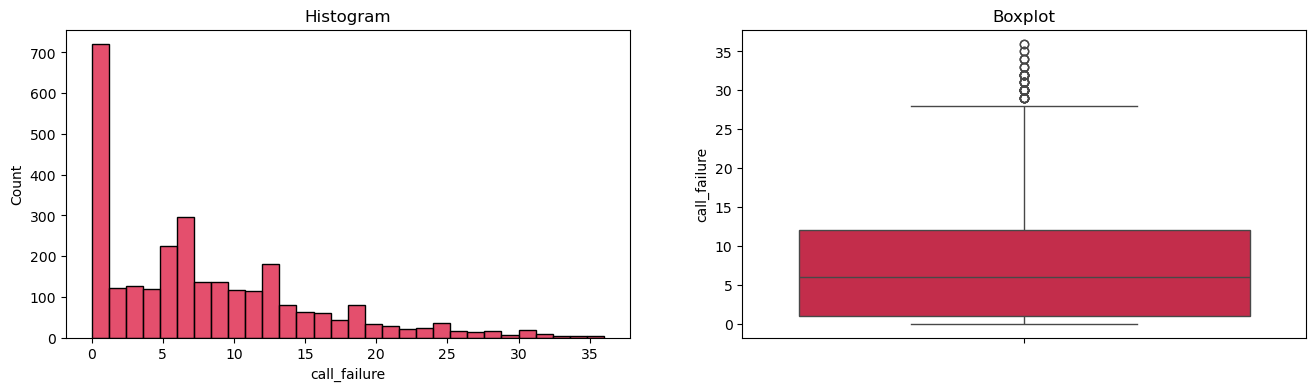


call_failure - Sesudah dilakukan Capping


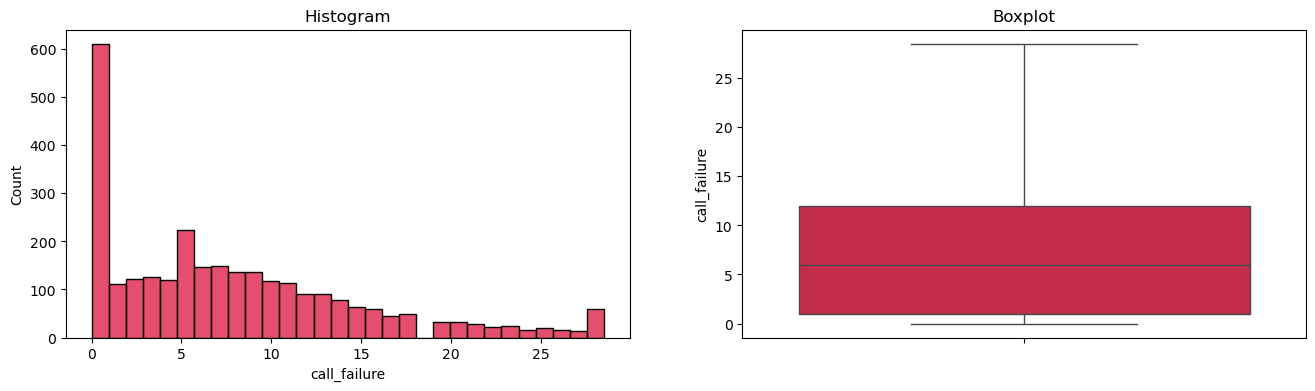

subscription_length - Sebelum dilakukan Capping


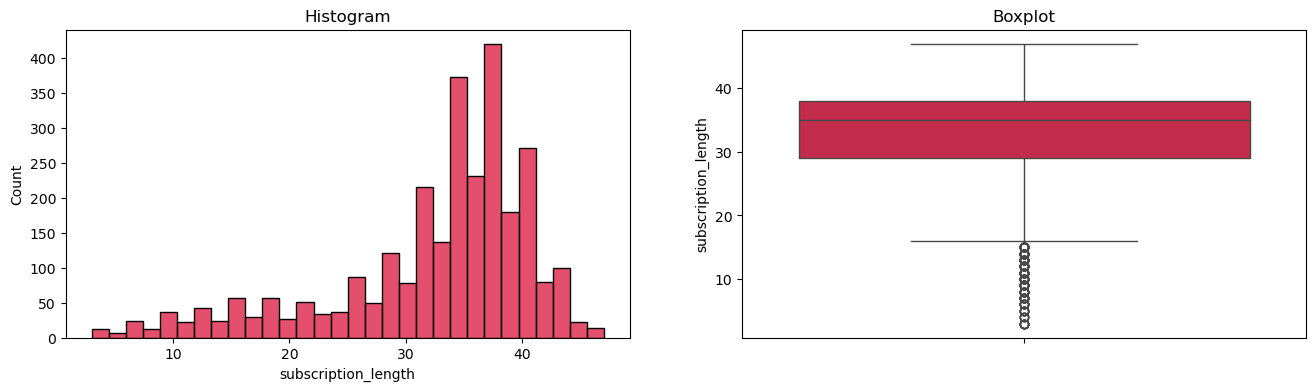


subscription_length - Sesudah dilakukan Capping


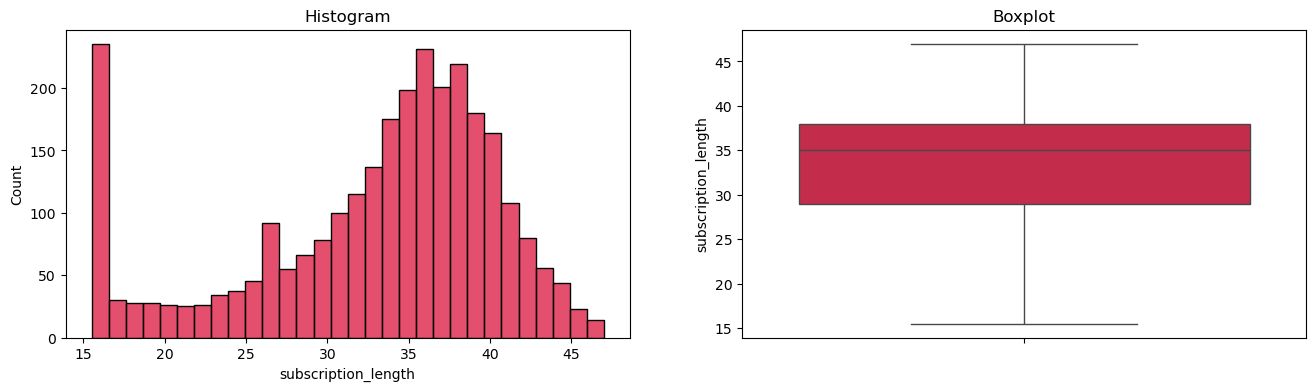

seconds_of_use - Sebelum dilakukan Capping


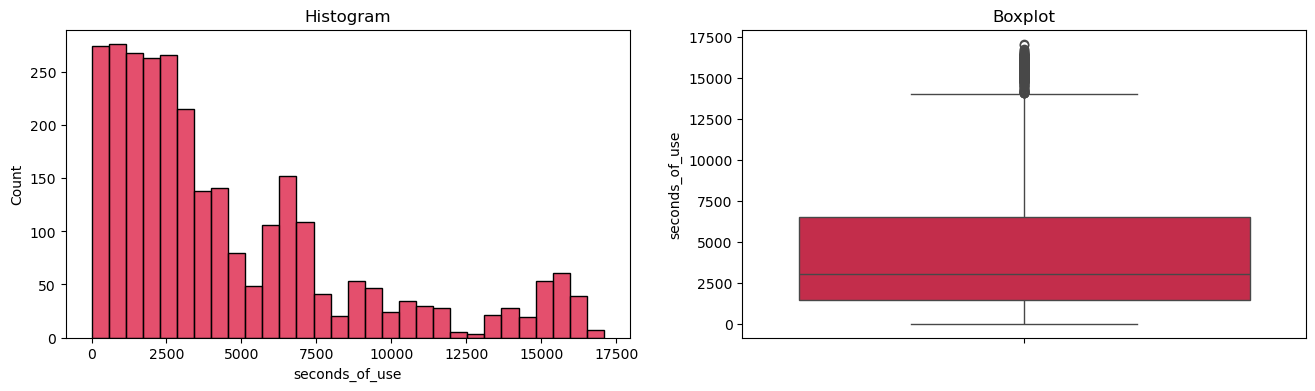


seconds_of_use - Sesudah dilakukan Capping


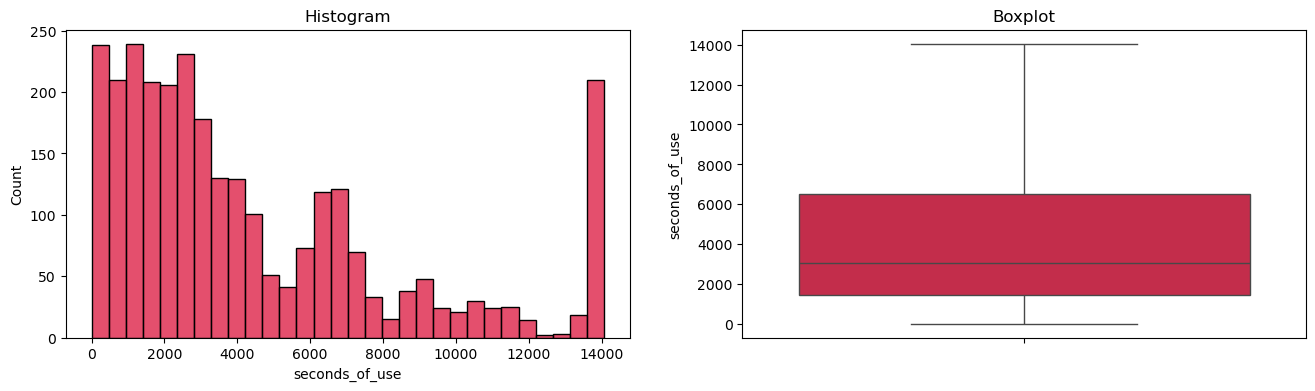

frequency_of_use - Sebelum dilakukan Capping


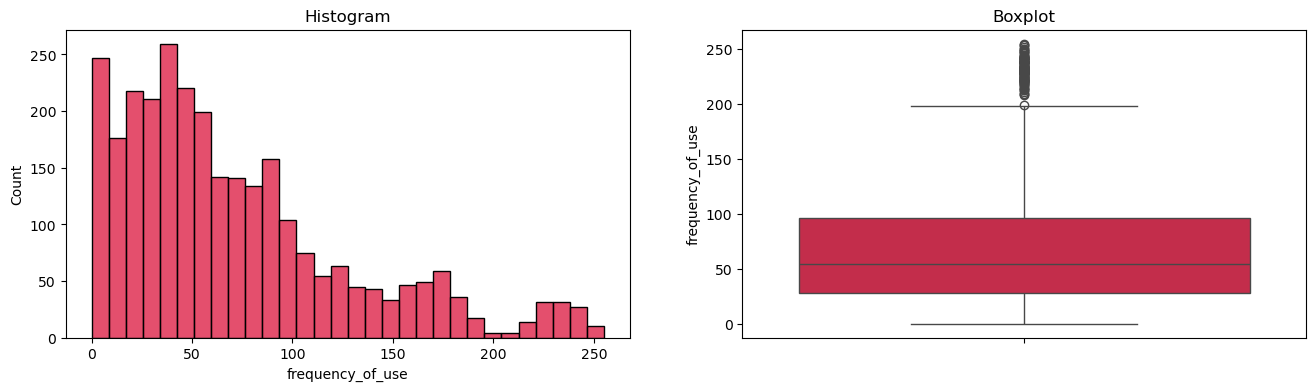


frequency_of_use - Sesudah dilakukan Capping


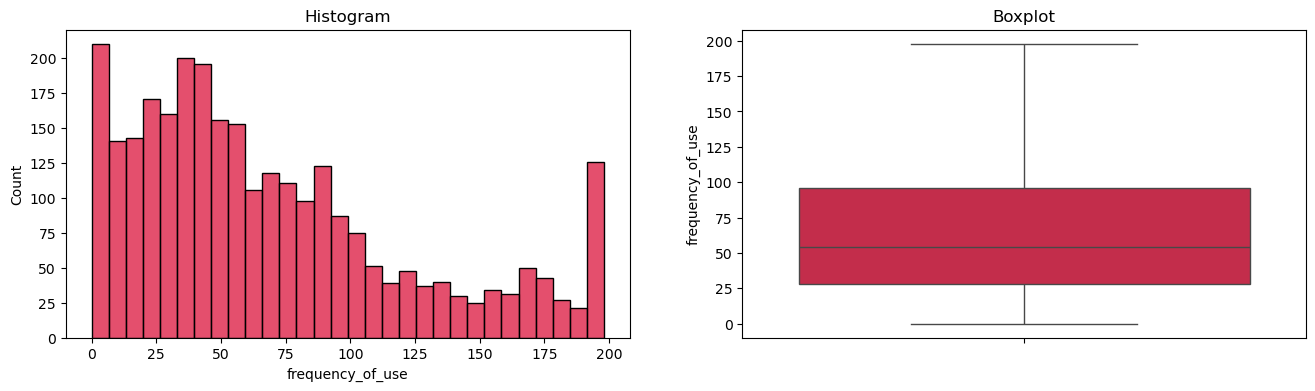

frequency_of_sms - Sebelum dilakukan Capping


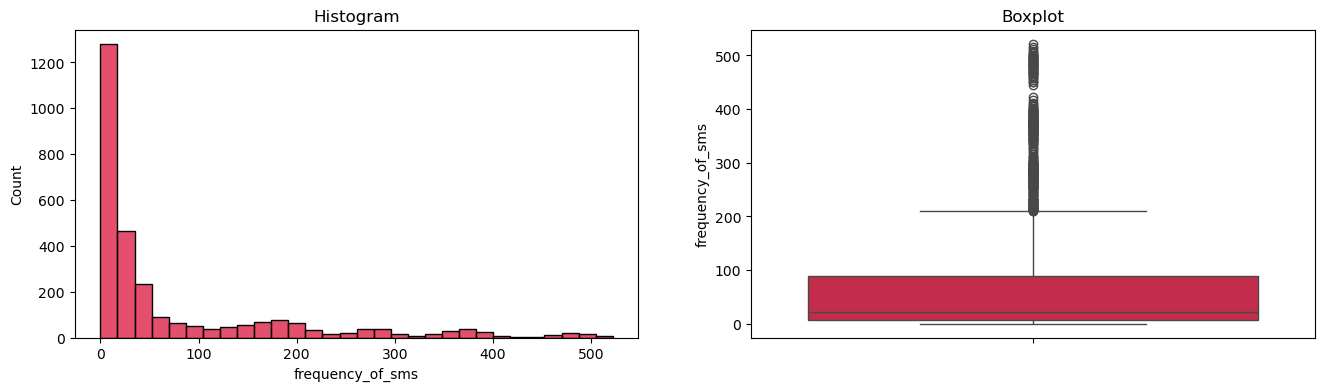


frequency_of_sms - Sesudah dilakukan Capping


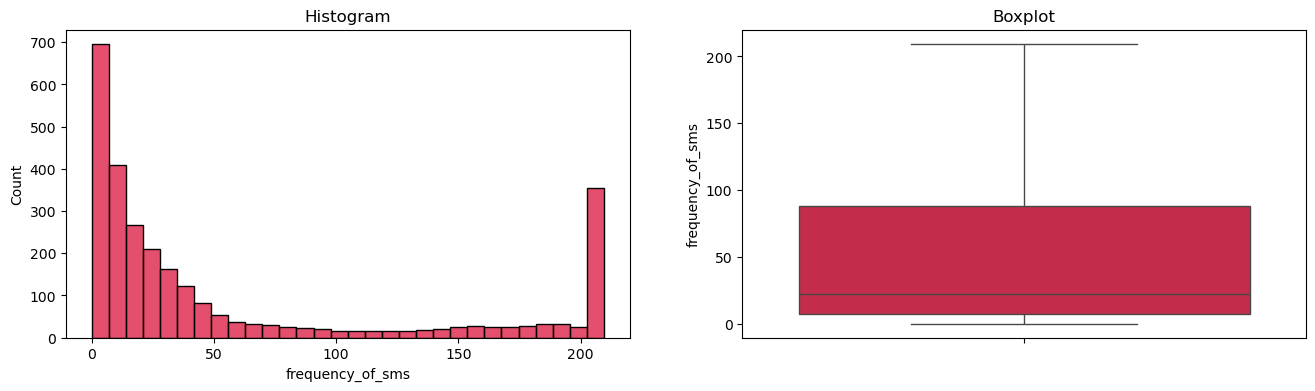

distinct_called_numbers - Sebelum dilakukan Capping


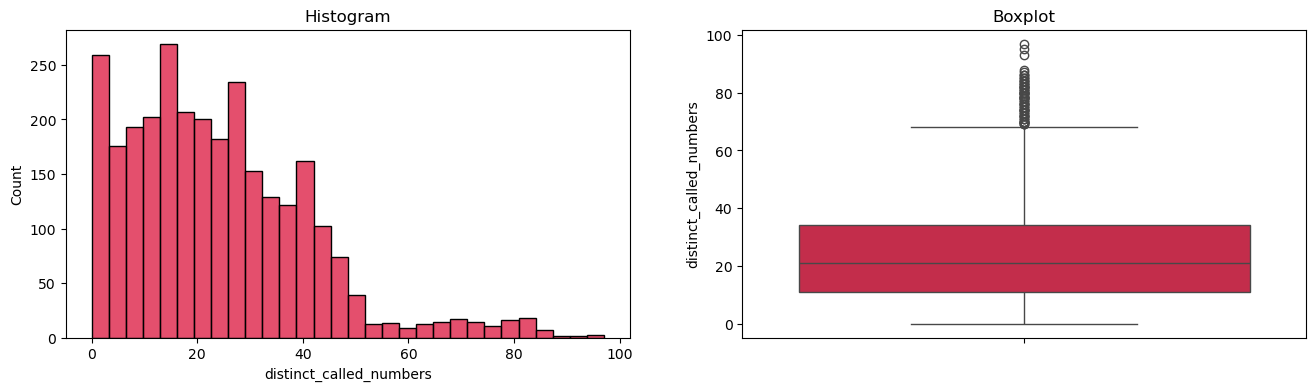


distinct_called_numbers - Sesudah dilakukan Capping


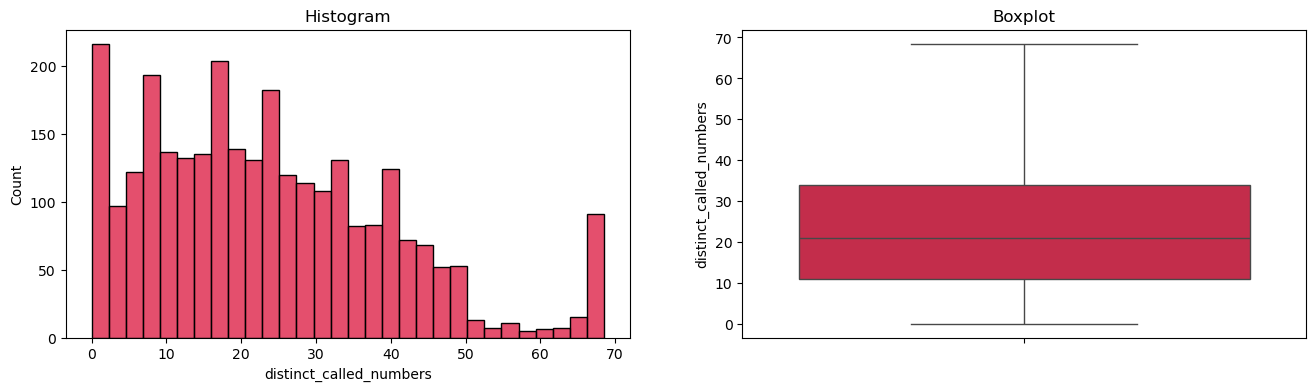

age - Sebelum dilakukan Capping


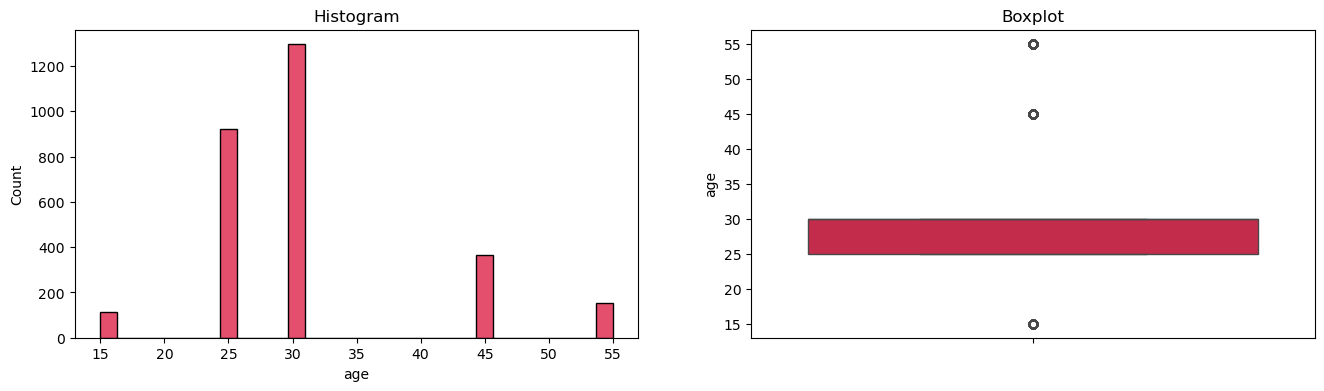


age - Sesudah dilakukan Capping


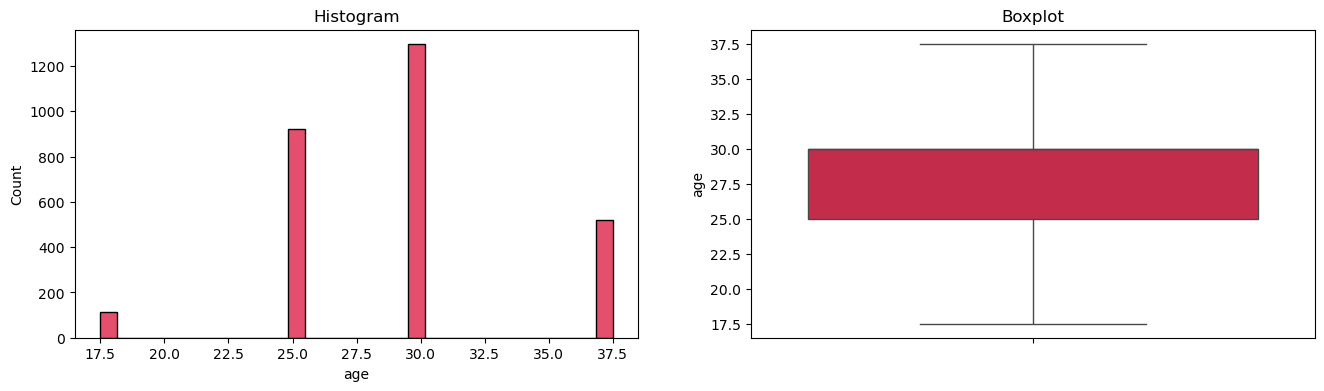

customer_value - Sebelum dilakukan Capping


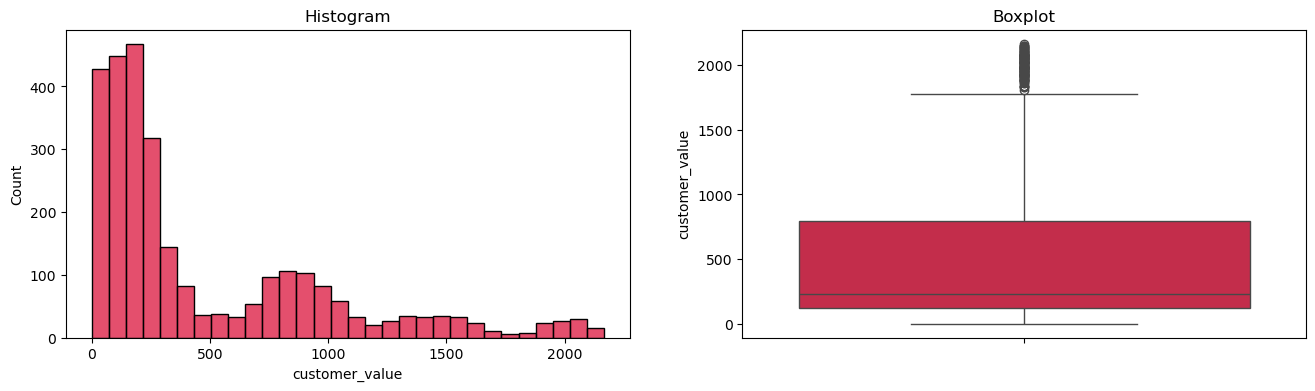


customer_value - Sesudah dilakukan Capping


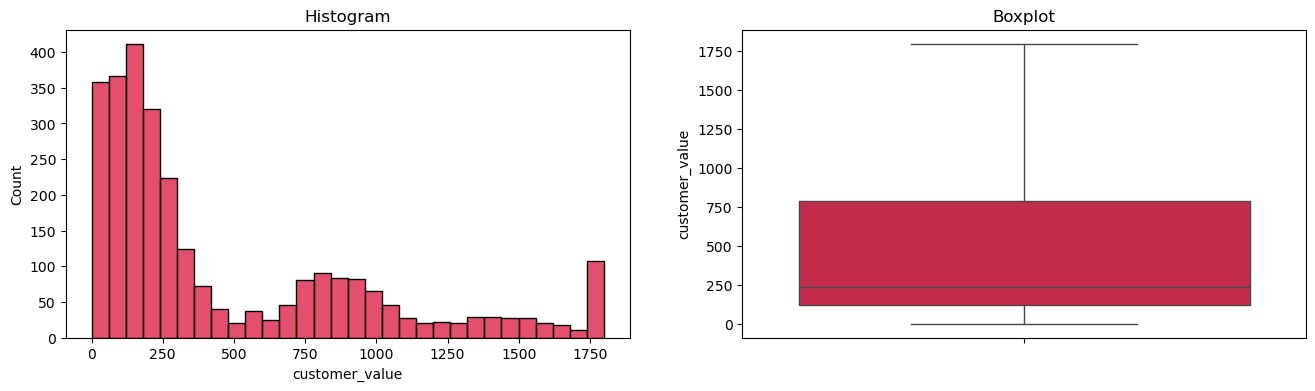

In [58]:
# Membuat visualisasi histogram dan boxplot
def plots(df, variables):
    plt.figure(figsize=(16, 4))

    # Menampilkan Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variables], bins=30, color='crimson')
    plt.title('Histogram')

    # Menampilkan Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variables], color='crimson')
    plt.title('Boxplot')

    # Menampilkan visualisasi
    plt.show()

# Melihat distribusi data sebelum dan setelah dilakukan capping
for col in num_cols:
  print(f'{col} - Sebelum dilakukan Capping')
  plots(df, col)

  print(f'\n{col} - Sesudah dilakukan Capping')
  plots(df_capped, col)

### **4.3. Feature Selection**

#### **4.3.1. Menguji Korelasi antar Fitur**

interval columns not set, guessing: ['call_failure', 'complains', 'subscription_length', 'charge_amount', 'seconds_of_use', 'frequency_of_use', 'frequency_of_sms', 'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age', 'customer_value', 'churn']


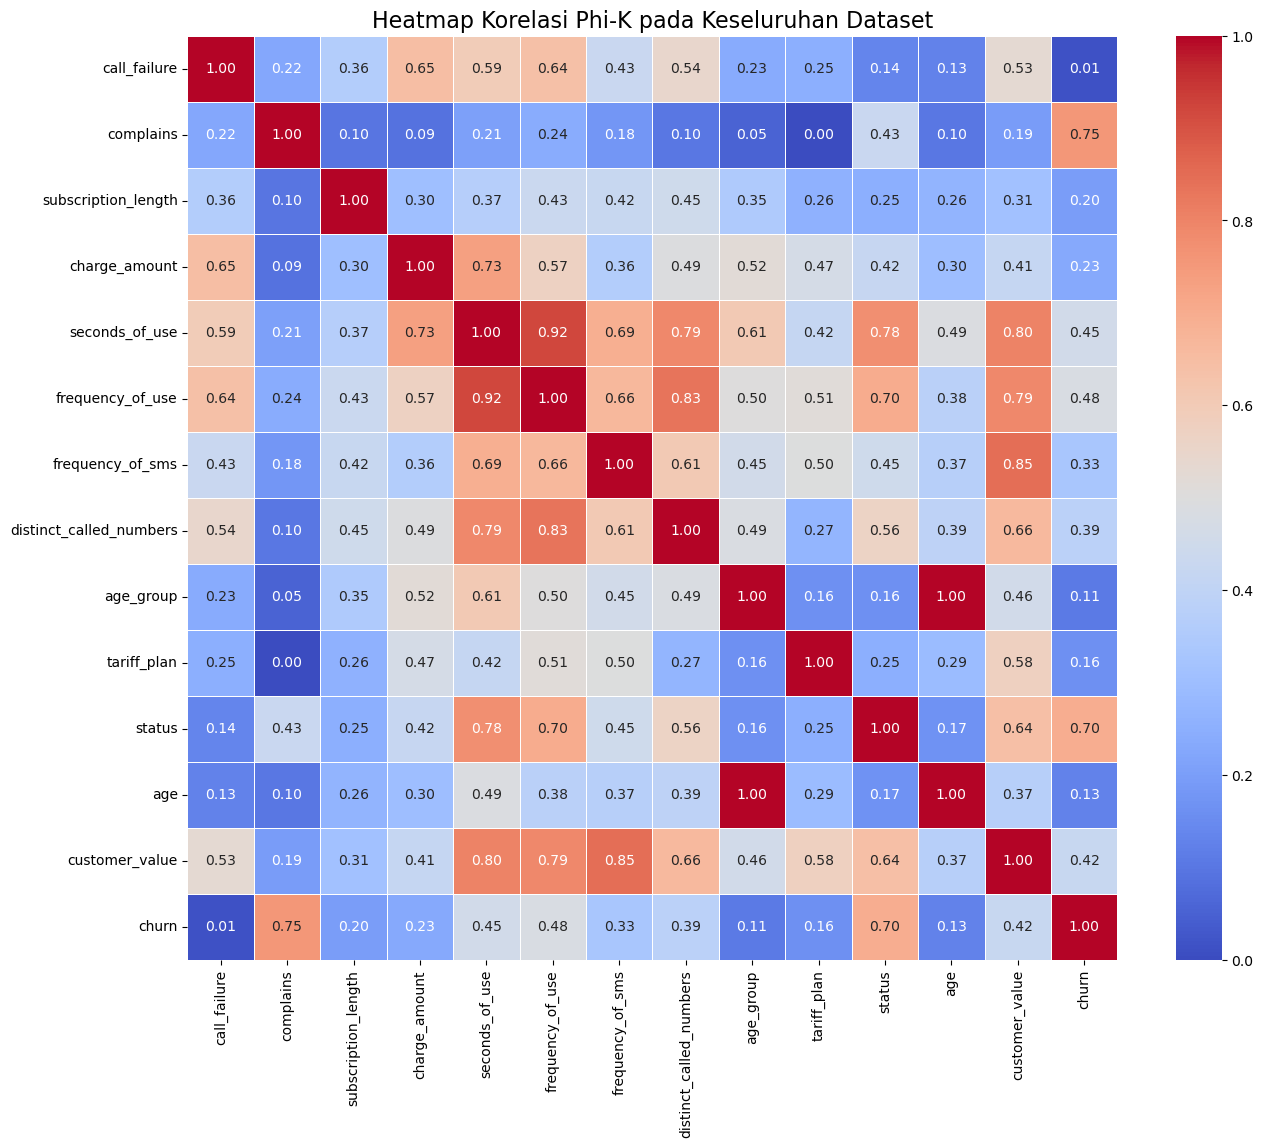

In [59]:
# Langkah 1: Hitung matriks korelasi Phi-K langsung pada seluruh data
phik_matrix_full = df_capped.phik_matrix()

# Langkah 2: Visualisasikan matriks sebagai heatmap
plt.figure(figsize=(15, 12))  # Mengatur ukuran gambar
sns.heatmap(
    phik_matrix_full,
    annot=True,          # Menampilkan nilai korelasi
    fmt=".2f",           # Format angka menjadi 2 desimal
    cmap='coolwarm',     # Gunakan skema warna yang intuitif untuk korelasi
    linewidths=.5
)
plt.title('Heatmap Korelasi Phi-K pada Keseluruhan Dataset', fontsize=16)
plt.show()

In [60]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'call_failure', 
    'age',
    'frequency_of_sms',
    'churn'     
]
# Menghapus kolom dari df_capped
df_selected = df_capped.drop(columns=columns_to_drop)

# Menampilkan 5 data pertama
df_selected.head()

,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,distinct_called_numbers,age_group,tariff_plan,status,customer_value
0,0,38.0,0,4370.0,71,17.0,3,1,1,197.640
1,0,39.0,0,318.0,5,4.0,2,1,2,46.035
2,0,37.0,0,2453.0,60,24.0,3,1,1,1536.520
3,0,38.0,0,4198.0,66,35.0,1,1,1,240.020
4,0,38.0,0,2393.0,58,33.0,1,1,1,145.805


#### **Preprocessing Pipeline**

In [61]:
# Kolom numerik (continuous)
numerical_cols_selected = ['subscription_length', 'seconds_of_use', 'frequency_of_use', 
                  'distinct_called_numbers', 'customer_value']

# Kolom ordinal (karena ada urutannya)
ordinal_cols_selected = ['charge_amount', 'age_group']

# Kolom kategorikal nominal (tanpa urutan)
categorical_cols_selected = ['complains', 'tariff_plan', 'status']

print(f"Kolom Numerik: {numerical_cols_selected}")
print(f"Kolom Ordinal: {ordinal_cols_selected}")
print(f"Kolom Kategorikal: {categorical_cols_selected}")

Kolom Numerik: ['subscription_length', 'seconds_of_use', 'frequency_of_use', 'distinct_called_numbers', 'customer_value']
Kolom Ordinal: ['charge_amount', 'age_group']
Kolom Kategorikal: ['complains', 'tariff_plan', 'status']


In [62]:
preprocessor= ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_cols_selected),
        ('ord_encode', OrdinalEncoder( handle_unknown='use_encoded_value', 
                                      unknown_value=-1), # Mengatasi unknown di test
                                      ordinal_cols_selected),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), 
                          categorical_cols_selected)
    ])

In [63]:
# Transformasi Fitur
# Fit dan transform data
df_preprocessed = pd.DataFrame(
    preprocessor.fit_transform(df),             # Melakukan scaling pada df_selected
    columns=df_selected.columns,                   # Memberikan nama kolom yang sesuai
    index=df_selected.index                        # Menjaga indeks yang sama dengan df_selected
)
df_preprocessed.head()

,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,distinct_called_numbers,age_group,tariff_plan,status,customer_value
0,0.636013,-0.039115,0.008975,-0.399660,-0.539223,0.0,2.0,0.0,0.0,0.0
1,0.750672,-1.004112,-1.141022,-1.155874,-0.833972,0.0,1.0,0.0,0.0,1.0
2,0.521355,-0.495655,-0.182691,0.007532,2.063820,0.0,2.0,0.0,0.0,0.0
3,0.636013,-0.080077,-0.078146,0.647405,-0.456828,0.0,0.0,0.0,0.0,0.0
4,0.636013,-0.509944,-0.217540,0.531064,-0.640000,0.0,0.0,0.0,0.0,0.0


**Multikolinearitas**

Langkah ini dilakukan untuk mengecek lagi apakah ada multikolinearitas di antara fitur-fitur yang dipilih. Sebelum menghitung nilai Variance Inflation Factor (VIF) untuk mendeteksi adanya multikolinearitas antar fitur, saya terlebih dahulu melakukan prosescolumn transform untuk standardisasi. Hal ini saya lakukan karena pada tahap selanjutnya, saya berencana menerapkan **teknik Principal Component Analysis (PCA) yang sensitif terhadap skala data**. Dengan melakukan scaling dan encoding terlebih dahulu, saya memastikan bahwa seluruh fitur berada pada skala yang sama, sehingga hasil perhitungan VIF dan transformasi PCA nantinya tidak bias terhadap fitur dengan skala yang lebih besar. <br>
Setelah data diskalakan dan di encode, saya lanjutkan dengan menghitung nilai VIF untuk mengidentifikasi apakah terdapat fitur yang memiliki multikolinearitas tinggi dan perlu dipertimbangkan untuk dihilangkan lagi sebelum proses PCA dilakukan.

In [64]:
def calc_vif(df_preprocessed):
    vif = pd.DataFrame()
    vif["Variables"] = df_preprocessed.columns
    vif["VIF"] = [variance_inflation_factor(df_preprocessed.values, i) for i in range(df_preprocessed.shape[1])]

    return(vif)
calc_vif(df_preprocessed)

,Variables,VIF
0,complains,1.169288
1,subscription_length,12.032669
2,charge_amount,13.143357
3,seconds_of_use,2.359828
4,frequency_of_use,1.397559
5,distinct_called_numbers,2.666761
6,age_group,2.275570
7,tariff_plan,1.198674
8,status,1.549202
9,customer_value,2.026436


Berdasarkan nilai VIF sebagian besar nilainya relatif rendah (di bawah 10), namun terdapat dua fitur dengan nilai VIF diatas 10 yang menunjukkan adanya multikolinearitas. Kami mengidentifikasi adanya VIF tinggi, dan memutuskan untuk drop fitur charge_amount yang memiliki nilai VIF paling tinggi.

In [65]:
df_vif = df_preprocessed.drop(columns=['charge_amount'])

In [66]:
def calc_vif(df_vif):
    vif = pd.DataFrame()
    vif["Variables"] = df_vif.columns
    vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

    return(vif)
calc_vif(df_vif)

,Variables,VIF
0,complains,1.167544
1,subscription_length,2.234115
2,seconds_of_use,1.924057
3,frequency_of_use,1.393851
4,distinct_called_numbers,2.409312
5,age_group,2.257793
6,tariff_plan,1.197469
7,status,1.383342
8,customer_value,2.024856


Setelah drop kolom charge_amount, nilai VIF kembali dihitung dan dihasilkan seluruh nilai pada fitur sekarang dibawah nilai 5 yang dapat disimpulkan bahwa sudah tidak ada masalah multikolinearitas.

### **4.4. Dimensionality Reduction**

In [67]:
# Dimensionality Reduction using PCA
# Inisialisasi PCA
pca = PCA()  # retain 95% variance
df_pca = pca.fit_transform(df_vif)

#print(f"Jumlah Komponen PCA: {pca.n_components_}")

Text(0, 0.5, 'Eigenvalues')

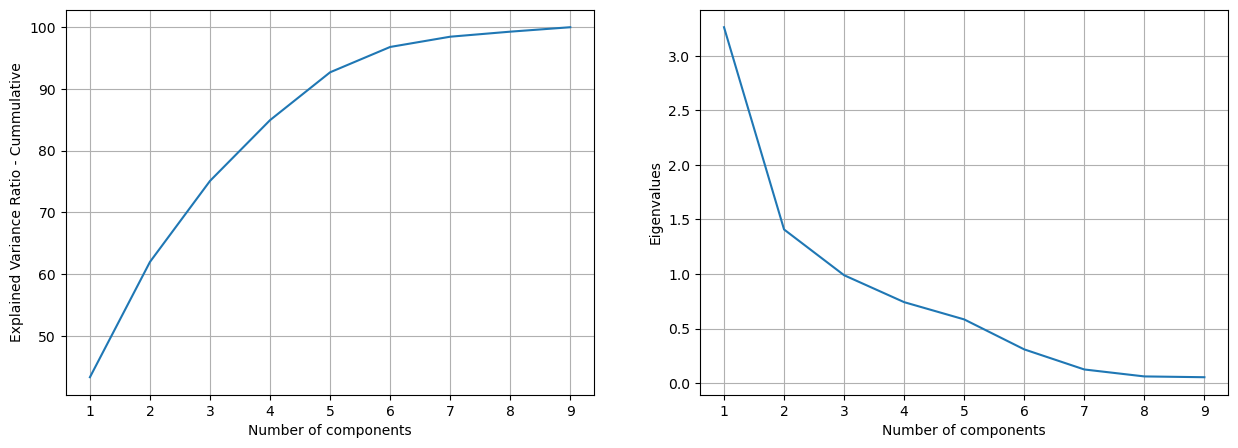

In [68]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

**Grafik Kiri — Cumulative Explained Variance Ratio**
* Dengan **1 komponen**: menjelaskan \~43% variansi.
* Dengan **2 komponen**: menjelaskan \~62% variansi.
* Dengan **5 komponen**: sudah menjelaskan \~93% variansi.
* Dengan **6 komponen**: sudah menjelaskan \~97-98% variansi.
* Dengan **7-9 komponen**: hampir 100%, artinya hampir semua informasi sudah terwakili.

* Secara umum, mulai dari 5-6 komponen sudah cukup representatif.
* Setelah 6 komponen, penambahan komponen tidak memberikan tambahan informasi yang signifikan (diminishing return).

**Grafik Kanan — Scree Plot (Eigenvalues)**

* Komponen 1 & 2 punya eigenvalue paling besar → paling informatif.
* Setelah komponen ke-3, eigenvalue mulai menurun signifikan.
* Mulai komponen ke-6 ke atas, eigenvalue sangat kecil → nyaris tidak berkontribusi.

In [69]:
# Cek jumlah fitur yang ingin dipertahankan jika kita ingin menyimpan 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(6)

Untuk menentukan jumlah komponen optimal, saya menghitung nilai cumulative explained variance. Hasilnya menunjukkan bahwa **6 komponen utama** sudah cukup untuk menjelaskan setidaknya **95% informasi** dari data asli. 

In [70]:
# Train model dengan 95% informasi dari dataset asli
# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=num_features)
# Fit PCA pada data yang sudah di-scale
pca.fit(df_vif)
# Transform data ke dalam ruang baru dengan 6 principal components 
df_pca_selected = pca.transform(df_vif)

### **4.5 Menentukan Jumlah Cluster**


#### **Using Elbow Method**


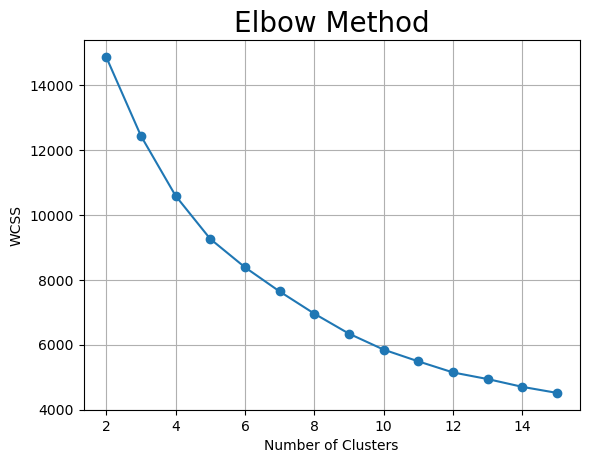

In [71]:
# Menentukan jumlah cluster yang optimal dengan Elbow Method
# Inisialisasi list untuk menyimpan nilai WCSS
wcss = []
random_state = 10
max_cluster = 15
# Menghitung WCSS untuk setiap jumlah cluster dari 2 hingga max_cluster
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_pca_selected)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Analisis grafik:
* WCSS masih menunjukkan pola penurunan yang signifikan dari cluster 2 hingga 4.
* Setelah cluster ke-5, penurunan WCSS mulai melambat.
* Dari cluster 6 ke atas, meskipun WCSS masih turun, tetapi tidak drastis

Dari grafik ini, elbow point paling terlihat di sekitar K=4 atau K=5. Setelah itu, penurunan WCSS tidak lagi signifikan. Jadi, kandidat jumlah cluster yang baik: 4 atau 5 cluster.

#### **Using Silhouette Score & Silhoutte Plot**


In [72]:
# Fungsi untuk membuat Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3209116740499332
For n_clusters = 3 The average silhouette_score is : 0.2604477910175474
For n_clusters = 4 The average silhouette_score is : 0.2844804617856419
For n_clusters = 5 The average silhouette_score is : 0.2889977732210257
For n_clusters = 6 The average silhouette_score is : 0.301377444559422
For n_clusters = 7 The average silhouette_score is : 0.28413545378648164
For n_clusters = 8 The average silhouette_score is : 0.23644600003040722
For n_clusters = 9 The average silhouette_score is : 0.2619809899644104
For n_clusters = 10 The average silhouette_score is : 0.26340671153940054
For n_clusters = 11 The average silhouette_score is : 0.2795606464892814
For n_clusters = 12 The average silhouette_score is : 0.26006380280267055
For n_clusters = 13 The average silhouette_score is : 0.26176711439677414
For n_clusters = 14 The average silhouette_score is : 0.2625378390950892


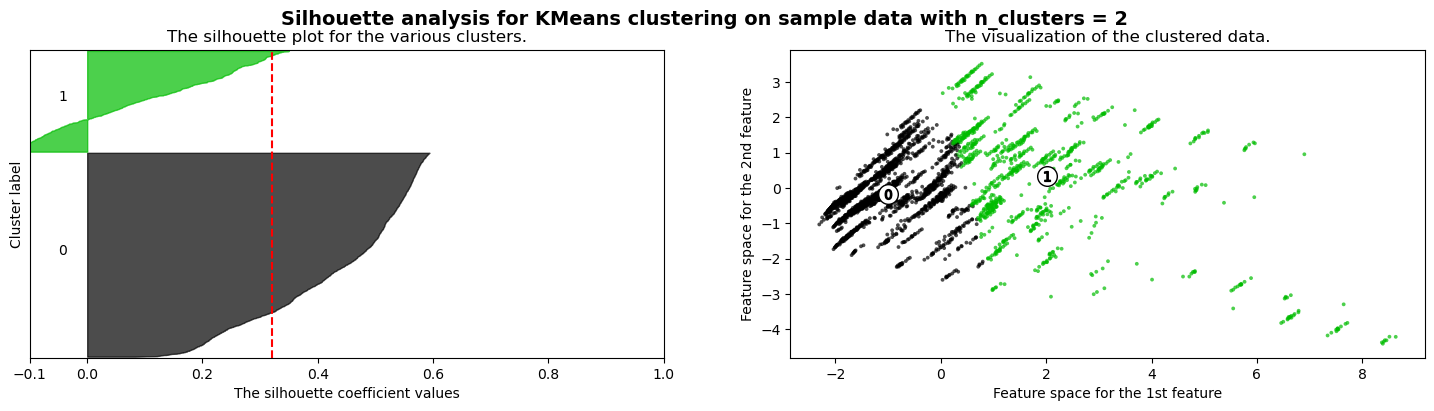

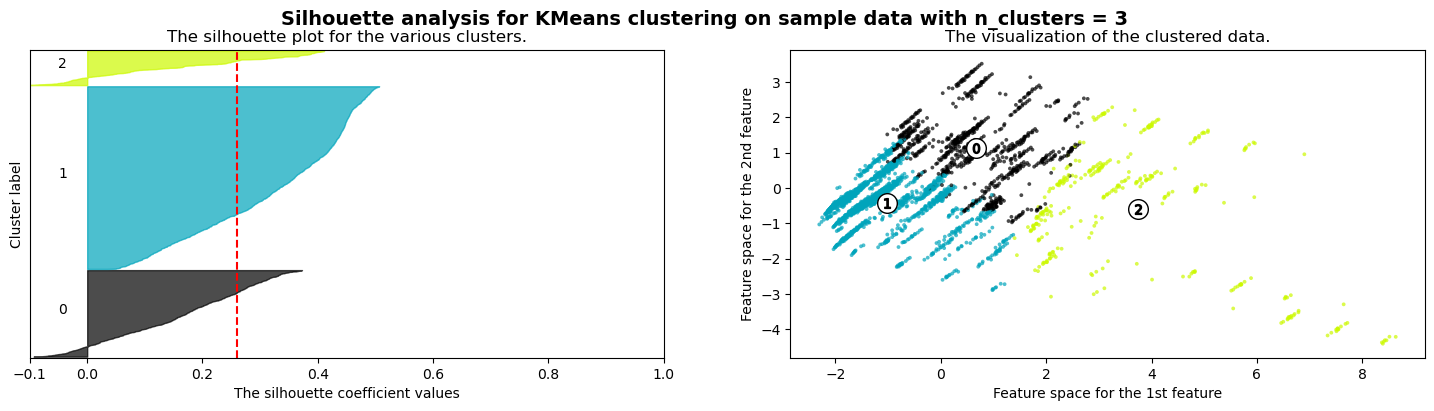

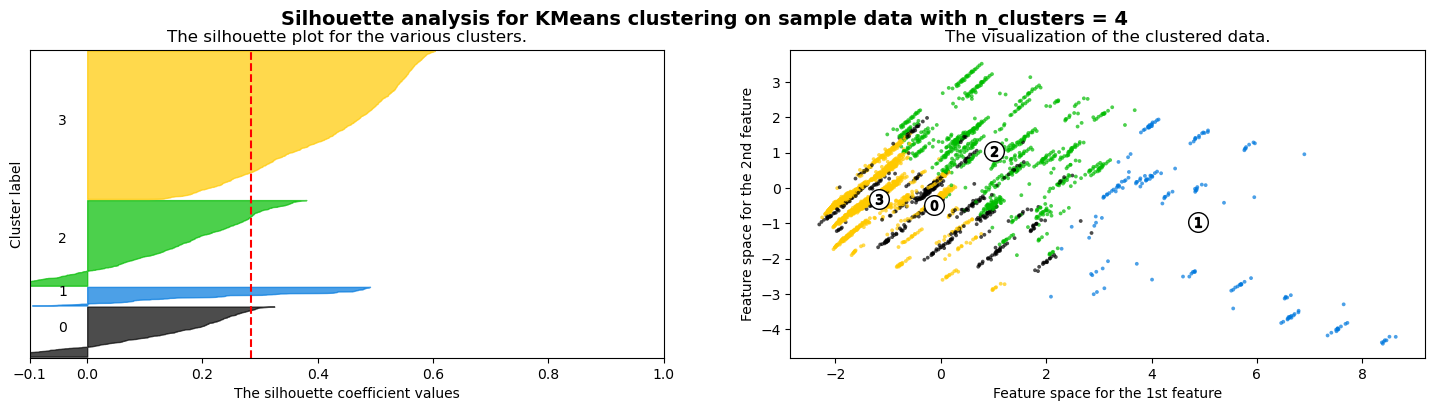

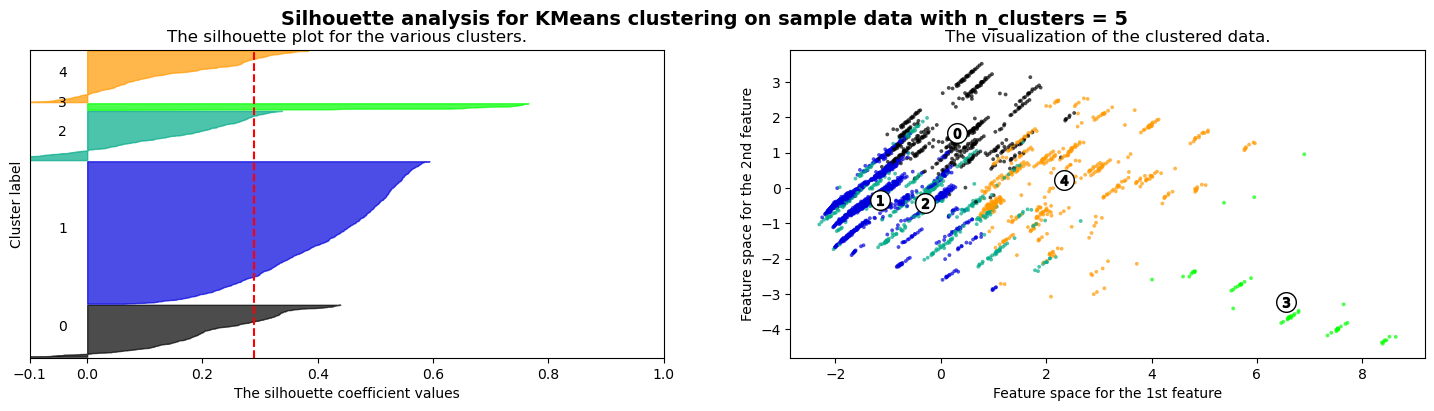

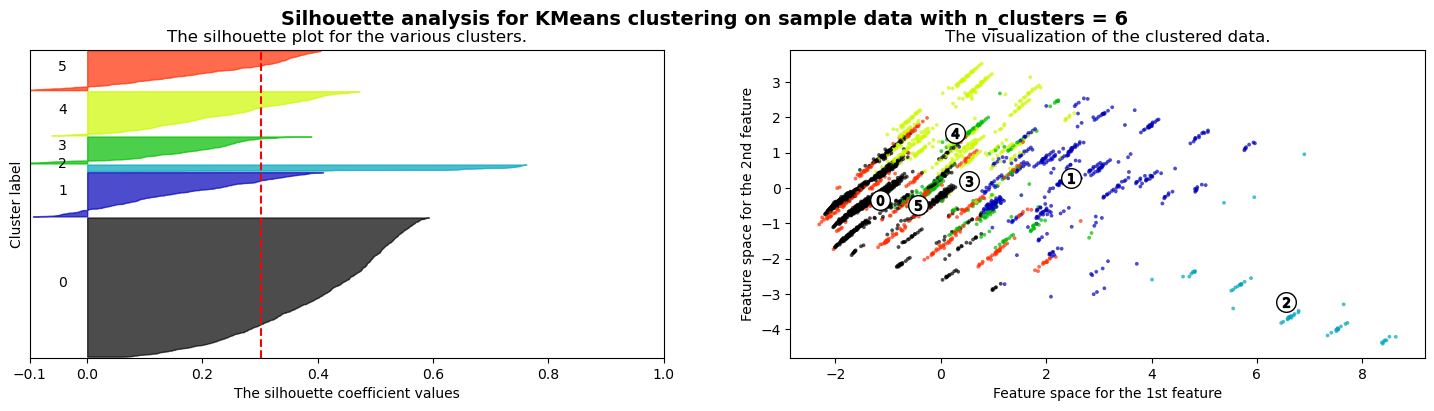

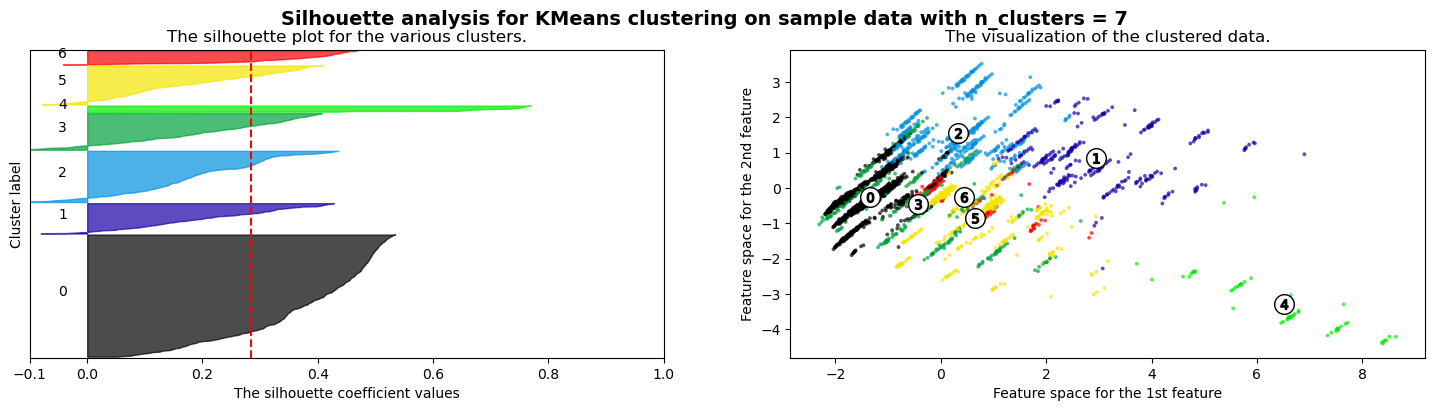

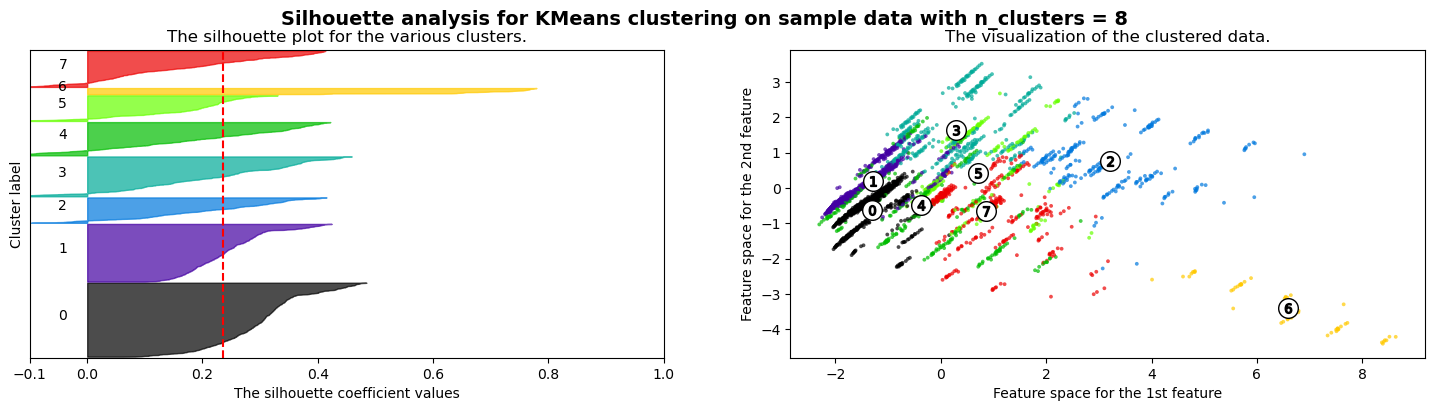

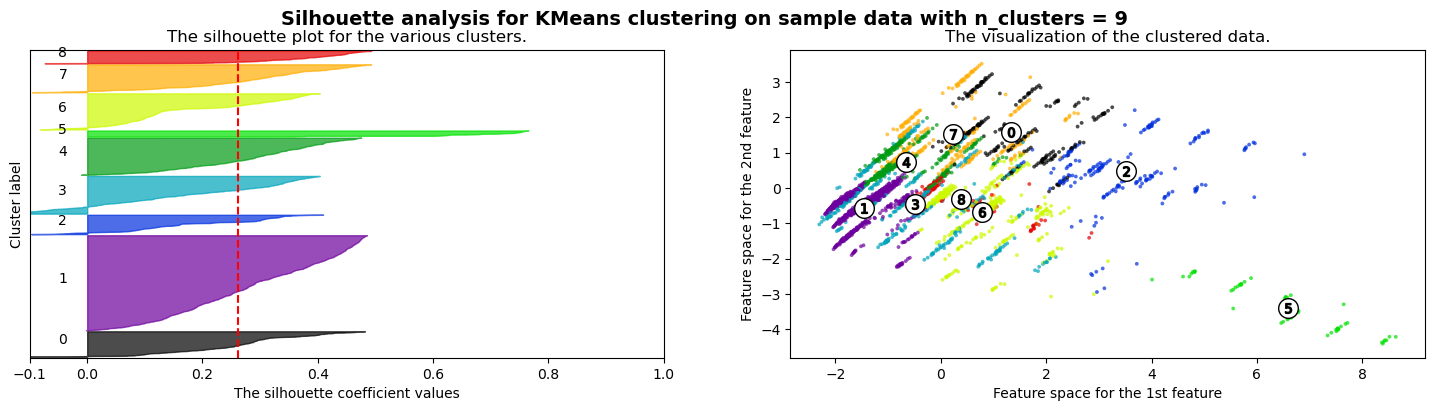

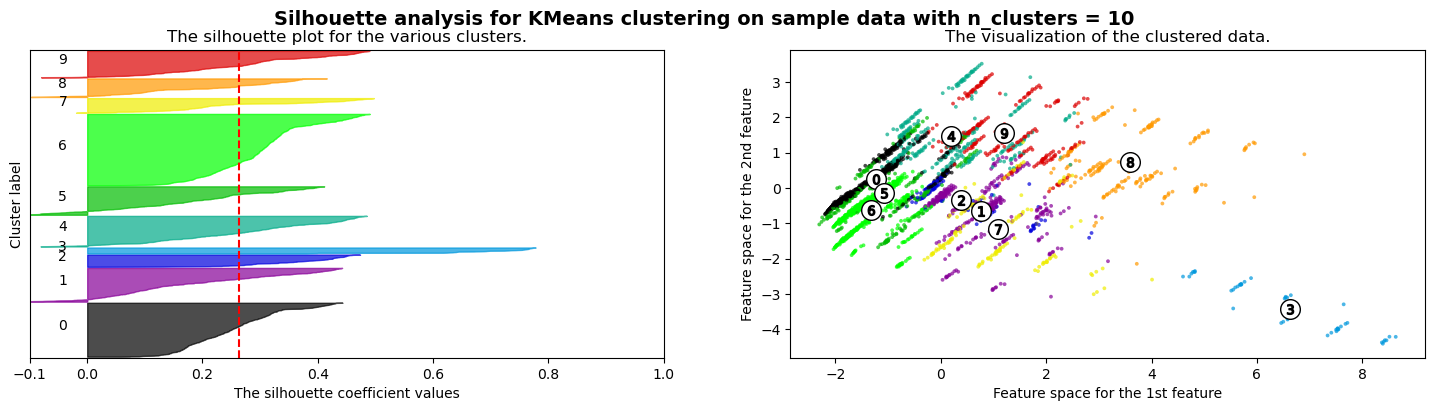

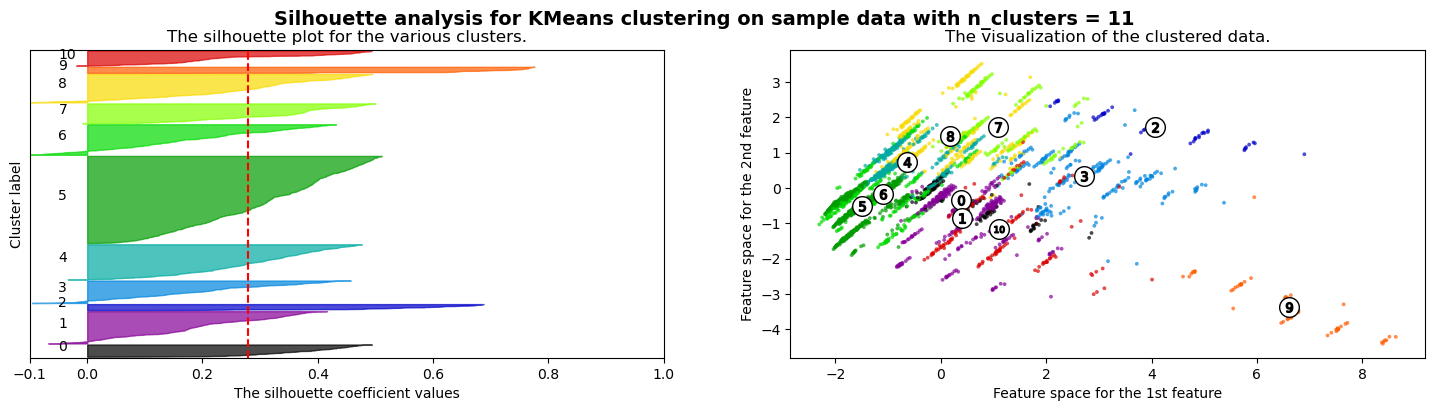

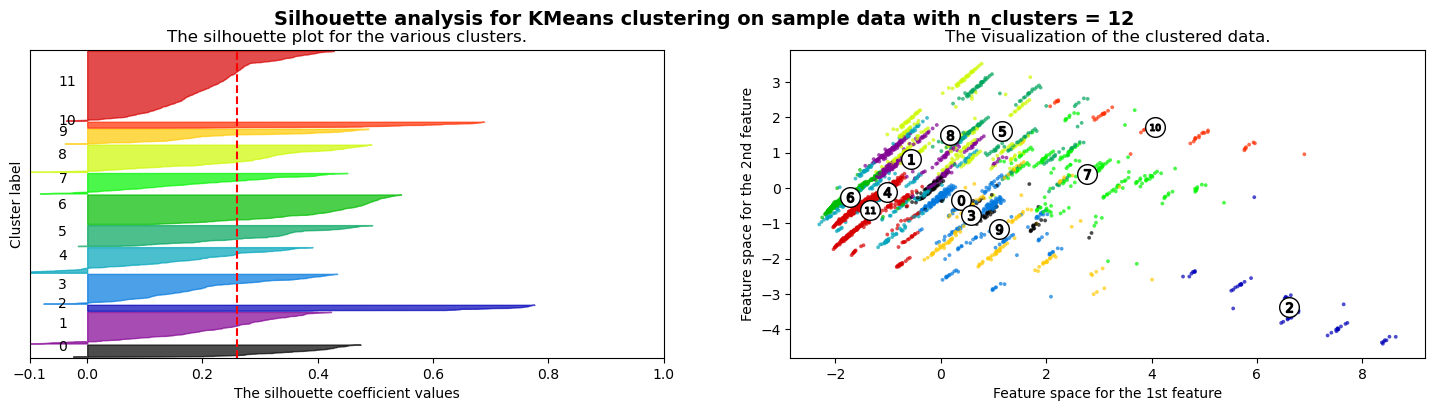

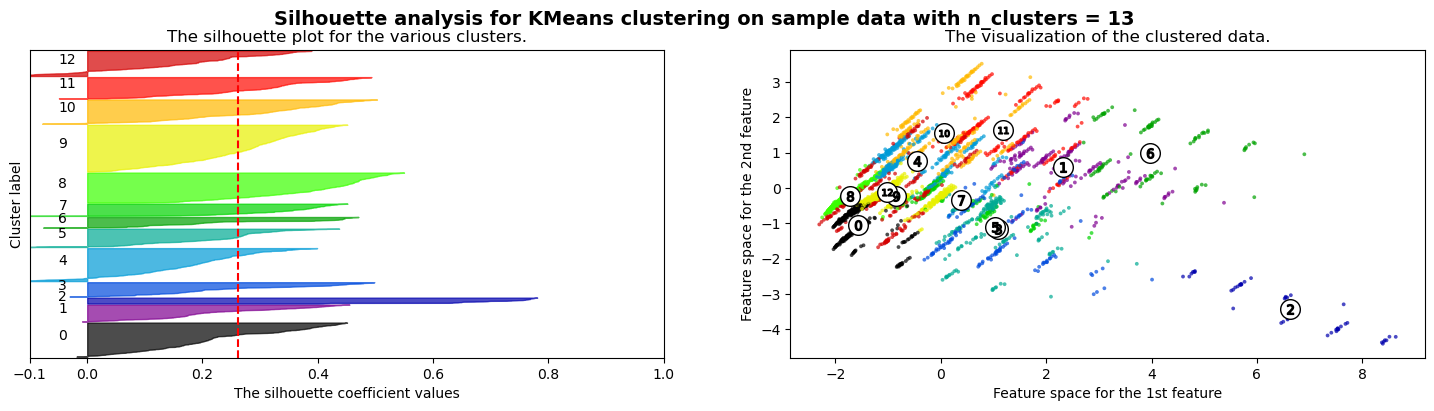

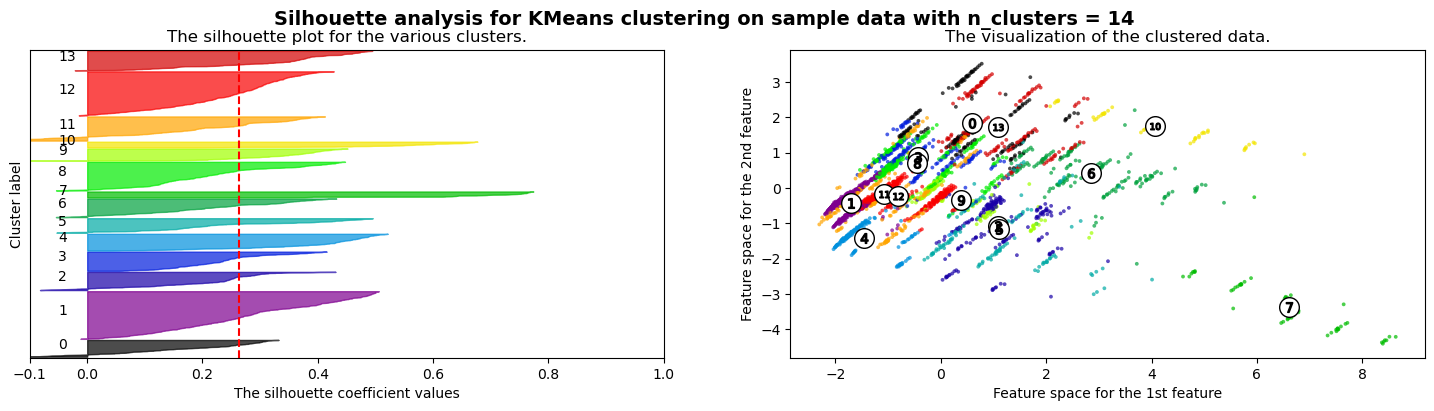

In [73]:
# Menampilkan Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_pca_selected, random_state)

**Analisis:**

* **Tertinggi ada di K=2 (0.321)** → tapi K=2 biasanya kurang informatif untuk segmentasi customer.
* **K=5 (0.289)** dan **K=6 (0.301)** cukup baik secara score, dan secara bisnis biasanya mulai masuk akal untuk segmentasi customer.
* **Setelah K=6** score mulai menurun → artinya tidak menambah banyak informasi baru kalau dipaksakan banyak cluster.

**Kesimpulan Gabungan Elbow + Silhouette:**

* Elbow: optimal di **K=4 atau K=5**
* Silhouette: nilai bagus di **K=5 (0.289)** atau **K=6 (0.301)**

**Keputusan Final: menggunakan K=5**

Alasannya:
* Masih sejalan dengan Elbow.
* Silhouette score cukup stabil.
* 5 cluster biasanya cukup informatif untuk profiling customer.

# **5. Modeling**
---


### **5.1. Train Model dengan Jumlah Cluster yang Optimal**

In [74]:
# Train model dengan jumlah cluster yang optimal
# Inisialisasi model K-Means dengan 5 cluster
k_optimal = 5
km = KMeans(n_clusters = k_optimal, 
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = random_state)
# Fit model pada data yang sudah di-scale
predict = km.fit_predict(df_pca_selected)
# Menampilkan hasil prediksi
predict

array([1, 1, 0, ..., 2, 3, 1], dtype=int32)

### **5.2. Menggabungkan Label Cluster ke DataFrame Asli**

In [75]:
# Memasukkan label cluster ke DataFrame asli 
df_capped['cluster'] = predict      # Menggunakan df_capped karena sudah dilakukan penanganan missing values dan capping ouliers
# Menampilkan dataset dengan label cluster
df_capped

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,8.0,0,38.0,0,4370.0,71,5.0,17.0,3,1,1,30.0,197.640,0,1
1,0.0,0,39.0,0,318.0,5,7.0,4.0,2,1,2,25.0,46.035,0,1
2,10.0,0,37.0,0,2453.0,60,209.5,24.0,3,1,1,30.0,1536.520,0,0
3,10.0,0,38.0,0,4198.0,66,1.0,35.0,1,1,1,17.5,240.020,0,1
4,3.0,0,38.0,0,2393.0,58,2.0,33.0,1,1,1,17.5,145.805,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,17.0,0,17.0,1,9237.0,177,80.0,42.0,5,1,1,37.5,261.210,0,2
2846,13.0,0,18.0,4,3157.0,51,38.0,21.0,3,1,1,30.0,280.320,0,2
2847,8.0,1,15.5,2,1792.0,25,7.0,9.0,3,1,1,30.0,100.680,1,2
2848,26.0,0,38.0,9,10740.0,99,8.0,44.0,5,2,1,37.5,174.585,0,3


In [76]:
# Menyimpan Dataset dengan Label Cluster
df_clustered = df_capped.copy()
df_clustered.to_csv('customer_clustered.csv', index=False)

### **5.3. Visualisasi Cluster 2D menggunakan 2 komponen PCA**

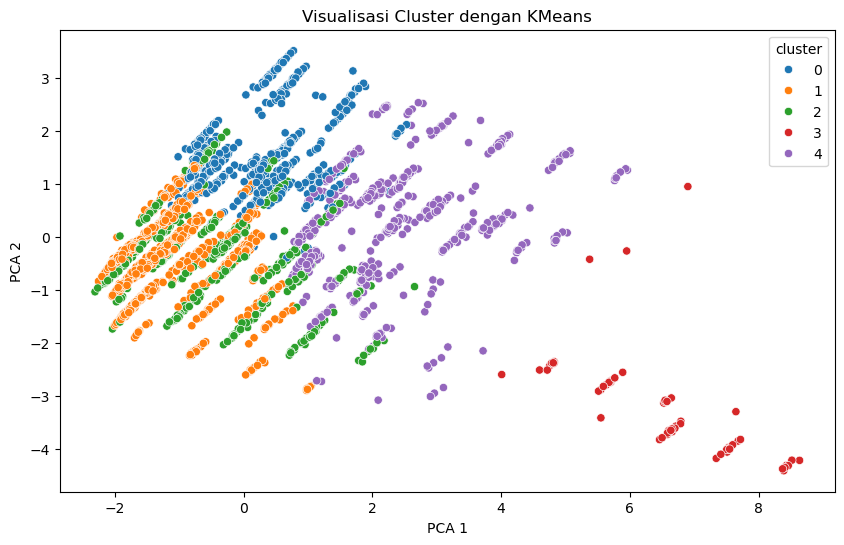

In [77]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=6, random_state=42)
# Fit PCA pada data yang sudah di-scale
pca_2d.fit(df_pca_selected)
# Transform data ke dalam ruang baru dengan 2 principal components
df_pca_selected_2d = pca_2d.fit_transform(df_pca_selected)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_selected_2d[:,0], 
                y=df_pca_selected_2d[:,1], 
                hue=df_clustered['cluster'], 
                palette='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Cluster dengan KMeans')
plt.show()

### **5.4. Menghitung Metrik Evaluasi Kuantitatif untuk Clustering**

Langkah selanjutnya adalah mengevaluasi kualitas pembentukan cluster secara kuantitatif untuk menilai aspek-aspek seperti kekompakan (seberapa mirip anggota dalam satu cluster) dan pemisahan (seberapa berbeda antar cluster). Metrik yang digunakan adalah **Silhouette Score**. 

Nilainya berkisar dari -1 hingga 1.
* Skor mendekati +1: Objek sangat cocok di clusternya dan jauh dari cluster tetangga (clustering baik).
* Skor mendekati 0: Objek berada di antara dua cluster (batasnya tidak jelas, cluster tumpang tindih).
* Skor negatif: Objek mungkin salah diklasifikasikan ke dalam cluster tersebut.

Rata-rata Silhouette Score untuk semua sampel memberikan gambaran keseluruhan kualitas clustering. Semakin tinggi, semakin baik.

In [78]:
# Evaluasi Cluster
silhouette = silhouette_score(df_pca_selected, predict)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.2889977732210257


# **6. EDA - Setelah Clustering**
---

### **6.1. Distribusi Jumlah Nasabah dalam setiap Cluster**

In [79]:
df_clustered.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,8.0,0,38.0,0,4370.0,71,5.0,17.0,3,1,1,30.0,197.640,0,1
1,0.0,0,39.0,0,318.0,5,7.0,4.0,2,1,2,25.0,46.035,0,1
2,10.0,0,37.0,0,2453.0,60,209.5,24.0,3,1,1,30.0,1536.520,0,0
3,10.0,0,38.0,0,4198.0,66,1.0,35.0,1,1,1,17.5,240.020,0,1
4,3.0,0,38.0,0,2393.0,58,2.0,33.0,1,1,1,17.5,145.805,0,1


In [80]:
# Menampilkan jumlah anggota per cluster
df_clustered['cluster'].value_counts().sort_index()

cluster
0     491
1    1346
2     466
3      62
4     485
Name: count, dtype: int64

**Analisis Churn Rate per Segmen**

In [81]:
# Menghitung rata-rata churn rate untuk setiap segmen
churn_rate_per_segment = df_clustered.groupby('cluster')['churn'].mean() * 100
print(churn_rate_per_segment)

cluster
0     0.203666
1    28.083210
2    13.733906
3     0.000000
4     0.618557
Name: churn, dtype: float64


| Cluster | Rata-rata Churn (%) | Interpretasi                                    |Persona / Nama Segmen | Jumlah |
| ------- | ------------------- | ----------------------------------------------- |----------------------| -------|
| 0       | **0.20%**           | Hampir tidak ada yang churn — sangat loyal      | Setia | 491|
| 1       | **28.08%**          | Tingkat churn tertinggi — perlu prioritas dalam strategi retensi | Beresiko Tinggi | 1346|
| 2       | **13.73%**          | Risiko churn sedang — Juga memiliki risiko churn yang signifikan, perlu perhatian | Waspada | 466|
| 3       | **0.00%**           | Pelanggan paling setia, tidak ada churn sama sekali di segmen ini| Juara Setia (Super Loyal) | 62|
| 4       | **0.62%**           | Stabil dan cukup loyal, namun masih ada potensi churn minimal                               | Potensial | 485|


* **Cluster 1** = pelanggan yang paling “berbahaya”, perlu strategi retensi segera.
* **Cluster 0, 3, 4** = pelanggan loyal, bisa diberi reward atau dijadikan “champion segment”.
* **Cluster 2** = pelanggan yang “agak riskan”, mungkin perlu intervensi ringan (misalnya komunikasi lebih baik).


### **6.2. Analisis Statistik Deskriptif per Cluster**

**Karakteristik Cluster 0**

In [82]:
# Statistik Deskriptif Cluster 0
cluster_0 = df_clustered[df_clustered["cluster"] == 0]
cluster_0.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,491.0,5.58,4.86,0.0,1.00,5.00,9.0,21.00
complains,491.0,0.00,0.05,0.0,0.00,0.00,0.0,1.00
subscription_length,491.0,36.04,3.52,26.0,34.00,36.00,38.0,45.00
charge_amount,491.0,0.52,0.67,0.0,0.00,0.00,1.0,3.00
seconds_of_use,491.0,6613.68,4231.51,1010.0,2761.50,6365.00,8740.0,14061.88
frequency_of_use,491.0,92.79,52.31,10.0,50.00,76.00,133.5,198.00
frequency_of_sms,491.0,157.75,70.24,0.0,129.00,193.00,209.5,209.50
distinct_called_numbers,491.0,27.77,11.82,1.0,20.00,27.00,37.5,63.00
age_group,491.0,2.55,0.53,1.0,2.00,3.00,3.0,4.00
tariff_plan,491.0,1.06,0.23,1.0,1.00,1.00,1.0,2.00


**Cluster 0 – "Setia"**

* **Churn Rate:** 0.20%
* **Karakteristik:**

  * **Penggunaan tinggi:** `seconds_of_use` tinggi (\~6600 detik), `frequency_of_use` dan `SMS` juga tinggi.
  * **Customer value tinggi:** Rata-rata di atas 1200.
  * **Subscription panjang:** Rata-rata 36 bulan.
  * **Komplain = 0** dan sangat sedikit call failure.
  * **Hampir semuanya aktif** (`status` = 1).
* **Interpretasi:**
  Ini adalah pelanggan **sangat loyal** dan **bernilai tinggi**. Tidak banyak masalah teknis, dan penggunaan sangat aktif. Mereka adalah pelanggan inti.
* **Strategi:**
  Pertahankan dengan reward/loyalty program. Bisa juga dijadikan target promosi produk baru karena keterlibatan tinggi.

**Karakteristik Cluster 1**

In [83]:
# Statistik Deskriptif Cluster 1
cluster_1 = df_clustered[df_clustered["cluster"] == 1]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,1346.0,5.81,6.08,0.0,0.00,5.00,9.00,28.50
complains,1346.0,0.13,0.33,0.0,0.00,0.00,0.00,1.00
subscription_length,1346.0,34.88,4.87,19.0,32.00,36.00,38.00,47.00
charge_amount,1346.0,0.23,0.51,0.0,0.00,0.00,0.00,3.00
seconds_of_use,1346.0,2194.15,1777.69,0.0,710.00,1848.00,3355.00,7190.00
frequency_of_use,1346.0,40.42,29.46,0.0,14.00,38.00,63.00,109.00
frequency_of_sms,1346.0,15.36,23.23,0.0,0.00,9.00,22.00,209.50
distinct_called_numbers,1346.0,14.80,10.35,0.0,6.00,14.00,22.00,48.00
age_group,1346.0,2.80,0.90,1.0,2.00,3.00,3.00,5.00
tariff_plan,1346.0,1.01,0.07,1.0,1.00,1.00,1.00,2.00


**Cluster 1 – "Beresiko Tinggi"**

* **Churn Rate:** 28.08% (paling tinggi)
* **Karakteristik:**

  * **Penggunaan rendah:** Seconds, frequency, SMS, dan `customer_value` sangat rendah (\~147).
  * **Subscription tetap panjang:** \~35 bulan.
  * Banyak yang **status = 2** (tidak aktif).
  * Komplain dan call failure cukup tinggi.
* **Interpretasi:**
  Ini adalah segmen **berisiko tinggi** untuk churn — mereka sudah tidak aktif atau engagement sangat rendah.
* **Strategi:**
  Reaktivasi lewat promo khusus, survei kebutuhan, atau penawaran win-back. Jika tak berhasil, bisa dipertimbangkan untuk tidak terlalu difokuskan.

**Karakteristik Cluster 2**

In [84]:
# Statistik Deskriptif Cluster 2
cluster_1 = df_clustered[df_clustered["cluster"] == 2]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,466.0,6.13,5.66,0.0,1.00,5.00,10.00,23.00
complains,466.0,0.08,0.27,0.0,0.00,0.00,0.00,1.00
subscription_length,466.0,18.76,4.16,15.5,15.50,16.00,21.75,30.00
charge_amount,466.0,0.92,1.05,0.0,0.00,1.00,2.00,4.00
seconds_of_use,466.0,3493.75,2578.28,0.0,1492.25,2547.00,4740.00,9947.00
frequency_of_use,466.0,61.95,52.81,0.0,28.00,39.00,65.00,188.00
frequency_of_sms,466.0,67.69,70.96,0.0,13.00,39.00,87.75,209.50
distinct_called_numbers,466.0,24.28,18.54,0.0,10.00,17.50,38.00,68.50
age_group,466.0,2.88,0.95,1.0,2.00,3.00,3.00,5.00
tariff_plan,466.0,1.20,0.40,1.0,1.00,1.00,1.00,2.00


**Cluster 2 – "Waspada"**

* **Churn Rate:** 13.73%
* **Karakteristik:**

  * **Customer value menengah (\~400)**, dan subscription **relatif singkat** (\~19 bulan).
  * Penggunaan sedang (telepon, SMS, dan frequency sedang).
  * **Tariff plan lebih tinggi dari rata-rata** (1.20), kemungkinan ini pelanggan baru yang mencoba paket lebih mahal.
* **Interpretasi:**
  Mereka **berisiko churn**, mungkin karena belum terikat kuat (baru berlangganan), atau ekspektasi tidak terpenuhi.
* **Strategi:**
  Fokus pada edukasi, onboarding, atau loyalty-building di fase awal. Kirim notifikasi manfaat/promo agar makin engage.

**Karakteristik Cluster 3**

In [85]:
# Statistik Deskriptif Cluster 3
cluster_1 = df_clustered[df_clustered["cluster"] == 3]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,62.0,21.06,4.88,10.00,17.25,21.0,25.00,28.50
complains,62.0,0.11,0.32,0.00,0.00,0.0,0.00,1.00
subscription_length,62.0,35.76,4.14,18.00,34.00,36.0,38.00,44.00
charge_amount,62.0,7.89,1.26,6.00,7.00,8.0,9.00,10.00
seconds_of_use,62.0,10407.85,1184.29,3758.00,10148.75,10435.0,10737.50,14061.88
frequency_of_use,62.0,96.60,21.24,61.00,87.25,93.0,99.00,198.00
frequency_of_sms,62.0,12.83,29.28,0.00,0.00,6.5,14.50,209.50
distinct_called_numbers,62.0,42.60,6.27,27.00,39.00,42.0,45.75,68.50
age_group,62.0,4.47,0.67,2.00,4.00,5.0,5.00,5.00
tariff_plan,62.0,1.35,0.48,1.00,1.00,1.0,2.00,2.00


**Cluster 3 – "Juara Setia (Super Loyal)"**

* **Churn Rate:** **0.00%**
* **Karakteristik:**

  * **Penggunaan paling tinggi** (`seconds_of_use` >10.000 detik), `charge_amount` besar (\~7.89), `customer_value` tinggi.
  * **Paling dewasa:** Usia mendekati 37 tahun.
  * Sangat aktif dalam telepon, tapi **tidak banyak SMS**.
  * **Subscription panjang (\~36 bulan)**, tidak ada yang `status=2`.
* **Interpretasi:**
  Ini pelanggan **paling premium** dan benar-benar loyal. Mereka **tidak churn sama sekali**.
* **Strategi:**
  Jangan ganggu kenyamanan mereka. Beri penghargaan khusus, bisa juga digunakan sebagai target **cross-sell** atau **testimoni pelanggan loyal**.

**Karakteristik Cluster 4**

In [86]:
# Statistik Deskriptif Cluster 4
cluster_1 = df_clustered[df_clustered["cluster"] == 4]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,485.0,15.24,6.87,1.00,10.00,14.00,20.00,28.50
complains,485.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
subscription_length,485.0,36.90,5.86,16.00,34.00,38.00,41.00,46.00
charge_amount,485.0,2.65,1.01,1.00,2.00,2.00,3.00,5.00
seconds_of_use,485.0,8623.95,4135.70,903.00,5000.00,7283.00,14061.88,14061.88
frequency_of_use,485.0,128.09,51.01,14.00,89.00,119.00,181.00,198.00
frequency_of_sms,485.0,77.45,73.64,0.00,19.00,44.00,142.00,209.50
distinct_called_numbers,485.0,40.64,14.95,10.00,30.00,38.00,49.00,68.50
age_group,485.0,2.98,0.88,1.00,2.00,3.00,3.00,5.00
tariff_plan,485.0,1.16,0.37,1.00,1.00,1.00,1.00,2.00


**Cluster 4 – "Potensial"**

* **Churn Rate:** 0.62%
* **Karakteristik:**

  * **Usage tinggi:** Seconds of use tinggi (\~8600 detik), frequency tinggi (\~128), banyak yang SMS.
  * **Customer value sedang (\~694)**.
  * **Call failure cukup tinggi** (\~15), tapi komplain hampir tidak ada.
  * Semua pelanggan aktif (`status` = 1).
* **Interpretasi:**
  Pelanggan aktif dan potensial menjadi **pelanggan loyal**, tapi masih di tengah-tengah — belum setinggi Cluster 0 atau 3.
* **Strategi:**
  Tawarkan peningkatan benefit atau fitur agar merasa lebih dihargai. Bisa diberi penawaran upgrade.

# **7. Model Saving**
---


In [101]:
df_fit = df_clustered.drop(columns=['charge_amount', 'churn', 'cluster'])

In [103]:
# Kolom numerik (continuous)
numerical_cols_selected = ['subscription_length', 'seconds_of_use', 'frequency_of_use', 
                  'distinct_called_numbers', 'customer_value']

# Kolom ordinal (karena ada urutannya)
ordinal_cols_selected = ['age_group']

# Kolom kategorikal nominal (tanpa urutan)
categorical_cols_selected = ['complains', 'tariff_plan', 'status']

print(f"Kolom Numerik: {numerical_cols_selected}")
print(f"Kolom Ordinal: {ordinal_cols_selected}")
print(f"Kolom Kategorikal: {categorical_cols_selected}")

Kolom Numerik: ['subscription_length', 'seconds_of_use', 'frequency_of_use', 'distinct_called_numbers', 'customer_value']
Kolom Ordinal: ['age_group']
Kolom Kategorikal: ['complains', 'tariff_plan', 'status']


In [104]:
preprocessor= ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_cols_selected),
        ('ord_encode', OrdinalEncoder( handle_unknown='use_encoded_value', 
                                      unknown_value=-1), # Mengatasi unknown di test
                                      ordinal_cols_selected),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), 
                          categorical_cols_selected)
    ])

In [105]:
# Gabungkan semuanya dalam pipeline akhir
full_clustering_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('pca', pca),
    ('clustering', km)
])

In [109]:
# Fit ulang pipeline ke data
full_clustering_pipeline.fit(df_vif)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['subscription_length',
                                                   'seconds_of_use',
                                                   'frequency_of_use',
                                                   'distinct_called_numbers',
                                                   'customer_value']),
                                                 ('ord_encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['age_group']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['complains', 'tariff_plan',
                                                   'status'])])),
                ('pca', PCA(n_components=np.int64(6))),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=10))])

In [110]:
# Simpan pipeline ke file
joblib.dump(full_clustering_pipeline, 'cluster_model.pkl')

['cluster_model.pkl']